<a href="https://colab.research.google.com/github/Ilya-Lopatin/opt_home3/blob/main/opt_home3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание 1. 

The file should be sent in the `.pdf` format created via $\LaTeX$ or [typora](<https://typora.io/>) or printed from pdf with the colab\jupyter notebook. The only handwritten part, that could be included in the solution are the figures and illustrations.

**Deadline: 15.04.21 21:59:59**

# Sequence convergence

1. Show with the definition that the sequence $\left\{ \dfrac{1}{k} \right\}_{k=1}^\infty$ does not have a linear convergence rate (but it converges to zero).

1. Determine the convergence or divergence of a given sequence $r_{k} = \frac{1}{k^2}$.

1. Show with the definition that the sequence $\left\{ \dfrac{1}{k^k} \right\}_{k=1}^\infty$ does not have a quadratic convergence rate (but it converges to zero).

1. Determine the convergence or divergence of a given sequence $r_{k} = 0.707^k$.

1. Determine the convergence or divergence of a given sequence $r_{k} = 0.707^{2^k}$.

1. Show that the sequence $x_k = 1 + (0.5)^{2^k}$ is quadratically converged to $1$.

1. Determine the convergence or divergence of a given sequence $r_k =\begin{cases} \left(\frac{1}{4}\right)^{2^k}, & \mbox{if } k\mbox{ is even} \\ \frac{x_{k-1}}{k}, & \mbox{if } k\mbox{ is odd} \end{cases}$.

1. Determine the convergence or divergence of a given sequence $r_k =\begin{cases} \frac{1}{k}, & \mbox{if } k\mbox{ is even} \\ \frac{1}{k^2}, & \mbox{if } k\mbox{ is odd} \end{cases}$.

1. Let $\left\{ r_k \right\}_{k=m}^\infty$ be a sequence of non-negative numbers and let $s > 0$ be some integer. Prove that sequence $\left\{ r_k \right\}_{k=m+s}^\infty$ is linearly convergent with constant $q$ if and only if a the sequence $\left\{ r_k \right\}_{k=m}^\infty$ converged linearly with constant $q$.
0


Ex. 1. С одной стороны, очевидно $r_k \to 0$. По тесту отношений:
$$
\lim_{k \to \infty} \frac{r_{k+1}}{r_k} = \lim_{k \to \infty} \frac{k}{k+1} = 1
$$
что соответствует сублинейной сходимости.
  
Ex. 2.  С одной стороны, очевидно $ r_k \to 0 $. Тест отношений:
$$
\lim_{k \to \infty} \frac{r_{k+1}}{r_k} = \lim_{k \to \infty} \frac{k^2}{ (k+1)^2} =1
$$
что соответствует сублинейной сходимости.

Ex. 3. Предположим, что квадратичная сходимость к нулю есть
$$
\frac{1}{k^k} \leq  C q^{2^k}
$$
Возвём $\ln$ от обоих частей:
$$
- k \ln k \leq 2^k \ln q + C' 
$$ 
И т.к. по предположению $ 0 < q < 1 $ имеем:
$$
\frac{k \ln k} { \ln q } - C' \geq 2^k
$$ 
Но известно, что степенной рост доминирует над ростом $k \ln k$, значит при любых фиксированных $q, C$ найдется достаточное большое $k$, начиная с которого неравенство выше (эквивалентное изначальному) будет неверным. 

Ex. 4. Из тест корней, очевидно, линейная с $q = 0.707$

Ex. 5. Из определения, очевидно, следует квадратичная сходимость с $q = 0.707$

Ex. 6 В наших обозначениях $x* = 1$, тогда:
$$
\left| x* - x_k \right| = 0.5^{2^k}
$$
квадратичная сходимость, по определению

Ex. 7 
$$
x_{k+1} = \frac{x_k}{k} = \frac{1}{k} (\frac{1}{4})^{2^k} 
$$
четные, нечетные $x_k$ отличаются домножением на $k^{-1}$, что из теста корней не влияет на тип сходимости, откуда получаем сверхлинейную сходимость (более точно: квадратичную)


Ex. 8 из теста корней имеем: 
$$
\varlimsup_{k \to \infty} \sqrt[k]{x_k} = \lim_{k \to \infty} \frac{1}{\sqrt[k]{k}} = 1
$$
с учетом, что $x_k \to 0$, получаем сублинейную сходимость

Ex. 9 это следует напрямую из определения верхнего предела (и его инвариантности относительно сдвига начала отсчета)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin
from numpy import exp
from numpy import abs

# Line search

1. Consider the function $$f(x) = (x + \sin x) e^x, \;\;\; x \in [-20, 0]$$ 
    ![](https://raw.githubusercontent.com/MerkulovDaniil/optim/master/docs/exercises/Unimodal.svg)

    Consider the following modification of solution localization method, in which the interval $[a,b]$ is divided into $2$ parts in a fixed proportion of $t: x_t = a + t*(b-a)$ (maximum twice at iteration - as in the dichotomy method). Experiment with different values of $t \in [0,1]$ and plot the dependence of $N (t)$ - the number of iterations needed to achieve $\varepsilon$ - accuracy from the $t$ parameter. Consider $\varepsilon = 10^{-7}$. Note that with $t = 0.5$ this method is exactly the same as the dichotomy method.

Text(0, 0.5, '$N$')

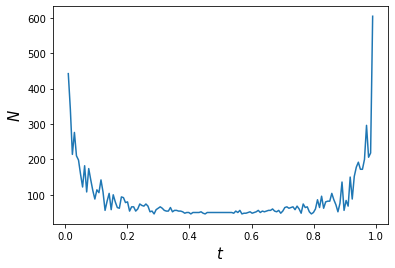

In [ ]:
def target_f (x) :
    return exp(x) * (x + sin(x))
    
def search_min (a , b, eps, t):
    N = 0
    while b - a > eps :
        m = a + t*(b-a)
        fl = target_f( m - eps)
        fr = target_f( m + eps)
        N += 2
        if fl < fr :
            b = m
        else :
            a = m
    return N       

t_sharp = np.linspace(0.01, 0.99, 150)
N_res = [ search_min (-2, 0, 1e-7, it) for it in t_sharp  ]
plt.plot( t_sharp, N_res )
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$N$', fontsize = 15)

Комментрарий: при малом или наоборот большом $t$ возможно ситуация, когда мы отсекаем очень малую часть из отрезка поиска, поэтому если минимум находится скажем около середины, а параметр $t$ мал, то мы будем постоянно отсекать слева малую часть и сходимость будет медленной, в то время как значение $t=1/2$ гарантировано отсечет половину поиска

2. Show that if $0 < c_2 < c_1 < 1$, there may be no step lengths that satisfy the Wolfe conditions (sufficient decrease and curvature condition).

3. Show that the one-dimensional minimizer of a strongly convex quadratic function always satisfies the Goldstein conditions.


2) Рассмотрим одну из самых простых задач оптимизации:
$$
f(x) = \|  x \|_2 ^2 \to min, x \in R^n
$$
Очевиден единственный минимум $x* = 0$.
Градиентный спуск для это задачи:
$$
x_{k+1} = ( 1 - 2 \mu ) x_k
$$
Условия  Вульфа:
$$
1)~ f(x_{k+1}) \leq  f(x_k) - c_1  \mu \| 2 x_k \|^2 \\
2)~ (1 - 2 \mu) <x_k , x_k> \leq c_2 < x_k, 2 x_k >
$$
Получаем:
$$
1)~ (1 - 2 \mu)^2 \leq 1 - 4 \mu c_1 \\
2)~  1 - 2 \mu \leq c_2
$$

Раскроем скобки в 1) и поделим на $\mu > 0$:
$$
\mu \leq 1 - c_1
$$
из второго:
$$
\mu \geq \frac{1-c_2}{2}
$$
Откуда $ 0 \leq 1 + c_2 - 2 c_1 $. Возмем "большое" $c_1$, скажем $c_1 = 0.6$ и  "маленькое c_2", скажем $c_2 =0.1$

3) Имеем:
$$
f(x) = \frac{1}{2} x^T A x - <b, x> \to min
$$
$$
∇ f(x) = A x - b
$$
Мы ищем минимум в доль прямой $ x_{k+1} = x_{k} + α_k p_k $. На семинаре мы выводили оптимальное значение для $\alpha_k$:
$$
\alpha_k = -\frac{ <∇ f(x_k), p_k> }{ p_k^T A p_k }
$$
Для полноты я кратко воспроизведу этот вывод. Мы приравнием производную к 0:
$$
\frac{d}{da} \left( f(x_k + \alpha_k p_k ) \right) =0
$$
откуда:
$$\frac{d}{da} (...) = \alpha p_k^T A p_k + < ∇ f(x_k), p_k>
$$
и считая $A$ -- положительно определенной получаем формулы выше.

Для упрощения достаточно громоздкой записи я буду писать $f_k = f(x_k)$

Условия Голдштейна:
$$
f_k + (1-c) α_k \leq \nabla f_k, p_k> \leq f_{k+1} \leq f_k + c \alpha_k \leq \nabla f_k, p_k>, ~ \forall c \in ( 0 , 1/2) 
$$
Подставим:
$$
f_{k+1}= f_k + α_k ( x_k^T A p_k ) + \frac{α^2}{2} ( p_k^T A p_k ) - α_k <b, p_k>
$$
$$
<∇ f_k, p_k> = p_k^T A x_k - <b, p_k>
$$
Выполняя ряд подстановок, получаем, что левое неравенство равносильно:
$$
-c x_k^T A p_k + c <p, b> \leq \frac{α}{2} p_k^T A p_k
$$
а праваое:
$$
x_k^T Q p_k + \frac{α}{2} ( p_k^T A p_k ) - <b, p_k> \leq c <x_k - b, p>
$$
Для вывполнение первого неравенства достаточно:
$$
2c < b - A^T x_k, p_k> \leq < b-  A^T x_k, p_k>
$$
что достигается при неотрицательности $< b - A^T x_k, p_k>$, выбор $p_k$ в качестве анти-градиента это гарантирует, ну или "достаточное близкое по навравлению к антиградиенту".

Для второго неравенства мы получаем суть то же условие:
$$
< b - A^T x_k, p_k> \leq 1(1-c) < b - A^T x_k, p_k>
$$
Требуемое доказано


# Zero order optimization

## Global optimization with scipy
Implement Rastrigin function $f: \mathbb{R}^d \to \mathbb{R}$ for d = 10. [link](https://www.sfu.ca/~ssurjano/rastr.html)

$$
f(\mathbf{x})=10 d+\sum_{i=1}^{d}\left[x_{i}^{2}-10 \cos \left(2 \pi x_{i}\right)\right]
$$

* Consider global optimization from [here](https://docs.scipy.org/doc/scipy/reference/optimize.html#global-optimization).
* Plot 5 graphs for different $d$ from {2,4,8,16,32}. On each graph you are to plot $f$ from $N_{fev}$ for 5 methods: `basinhopping`, `brute`, `differential_evolution`, `shgo`, `dual_annealing` from scipy, where $N_{fev}$ - the number of function evaluations. This information is usually avalable from `specific_optimizer.nfev`. If you will need bounds for the optimizer, use $x_i \in [-5, 5]$.

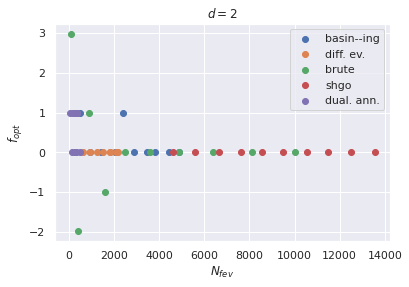

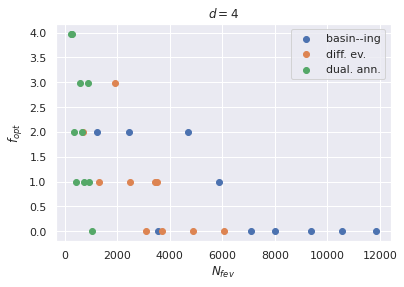

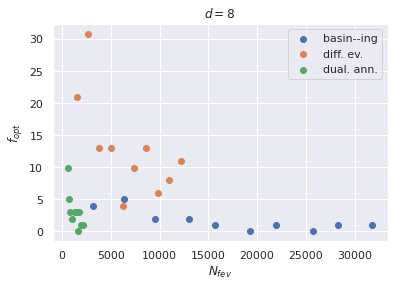

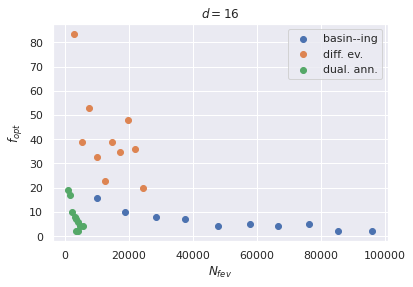

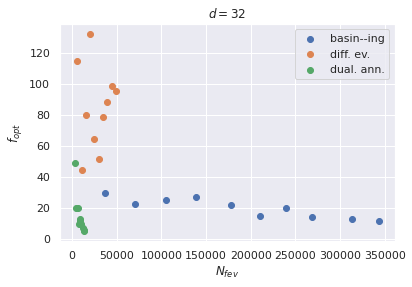

In [44]:
import numpy as np
from numpy import cos
from numpy import pi
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as scopt

def targget_func(x):
    sum = 10* len(x)
    for it in x:
        sum  += ( it**2 - 10* cos( 2*pi*it ) )
    return sum

def get_np ( x):
    y = np.array(x)
    return y    

d = [2,4,8,16,32]
for it in  d :
    x_0 = np.ones( it ) 
    b_hing = []
    brute = []
    diff_ev = []
    shgo = []
    dual_ann = []
    for Nit in range(10, 101, 10) :
        bh_out = scopt.basinhopping( targget_func , x_0, niter = Nit  )
        b_hing.append( [ bh_out.nfev, bh_out.fun ] )

        input = []
        for k in range( it ):
            input.append( [-5,5] )
        if ( it <= 2):
            brute_out = scopt.brute( targget_func, input, Ns = Nit )
            brute.append( [ Nit**it , brute_out[1] ] )
            shgo_out = scopt.shgo(targget_func, input, sampling_method="sobol",
                                  options={"maxiter" : Nit})
            shgo.append([ shgo_out.nfev, shgo_out.fun])

        diff_ev_out = scopt.differential_evolution( targget_func, 
                                                   input, maxiter = Nit )
        diff_ev.append([ diff_ev_out.nfev, diff_ev_out.fun ] )
        dual_ann_out = scopt.dual_annealing( targget_func, input, maxiter = Nit)
        dual_ann.append([ dual_ann_out.nfev, dual_ann_out.fun])
    plt.scatter( get_np( b_hing )[:,0], get_np( b_hing )[:, 1], 
                label = "basin--ing")
    plt.scatter( get_np( diff_ev )[:,0], get_np( diff_ev )[:, 1], 
                label = "diff. ev.")
    if ( it <= 2):
        plt.scatter( get_np(brute )[:,0], get_np(brute )[:, 1], 
                    label = "brute")
        plt.scatter( get_np( shgo )[:,0], get_np( shgo )[:, 1], 
                    label = "shgo")
    plt.scatter( get_np( dual_ann)[:,0], get_np( dual_ann)[:, 1], 
                label = "dual. ann.")
    plt.legend()
    plt.xlabel("$N_{fev}$")
    plt.ylabel("$f_{opt}$")
    plt.title('$d=$'+str(it))
    plt.show()

Комментарий: для методов и bture и shgo я построил граифии только при $d=2$, т.к. при больших размерностях или работа необозримо долгая или вообще collab не запускает ввиду ограничения на ресурсы. 

## Hyperparameter search with optuna
Machine learning models often have hyperparameters. To choose optimal one between them one can use GridSearch or RandomSearch. But these algorithms computationally uneffective and don't use any sort of information about type of optimized function. To overcome this problem one can use [bayesian optimization](https://distill.pub/2020/bayesian-optimization/). Using this method we optimize our model by sequentially chosing points based on prior information about function. ![Image](https://www.resibots.eu/limbo/_images/bo_concept.png). 

In this task you will use [optuna](https://optuna.org/) package for hyperparameter optimization RandomForestClassifier. Your task is to find best Random Forest model varying at least 3 hyperparameters on iris dataset. Examples can be find [here](https://optuna.org/#code_examples) or [here](https://colab.research.google.com/github/optuna/optuna/blob/master/examples/quickstart.ipynb)

In [45]:
!pip install optuna -q

     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 210 kB 54.3 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 146 kB 43.0 MB/s 
     |████████████████████████████████| 113 kB 35.7 MB/s 


In [46]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm

import optuna

iris = sklearn.datasets.load_iris()
x, y = iris.data, iris.target

In [47]:
print(x.shape, y.shape)

(150, 4) (150,)


In [48]:
# Here is the example of objective function, which depends on two variables (n_estimators, max_depth). But you'll need to choose at least 3.
def objective():
    iris = sklearn.datasets.load_iris()  # Prepare the data.
    
    clf = sklearn.ensemble.RandomForestClassifier(    
        n_estimators=5, max_depth=3)  # Define the model.
    
    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()  # Train and evaluate the model.

print('Accuracy: {}'.format(objective()))

Accuracy: 0.9533333333333333


In [49]:
def objective(Trial):
    iris = sklearn.datasets.load_iris()
    
    n_estimators = Trial.suggest_int('n_estimators', 50, 500)
    max_depth  =  Trial.suggest_int('max_depth ', 50, 100) 
    min_samples_leaf = Trial.suggest_int('min_samples_leaf', 2, 10)
    min_samples_split = Trial.suggest_int('min_samples_split', 2, 10)

    clf = sklearn.ensemble.RandomForestClassifier(    
        n_estimators = n_estimators, max_depth  = max_depth, 
        min_samples_leaf = min_samples_leaf, 
        min_samples_split =min_samples_split )
    
    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3).mean() 

study = optuna.create_study(direction ='maximize')
study.optimize(objective, n_trials = 50)

Trial = study.best_trial

print('Accuracy by optuna: {}'.format( Trial.value) )
print('Params by optuna: {}'.format( Trial.params ) )

[I 2022-04-16 11:46:19,077] A new study created in memory with name: no-name-c276ebbe-7003-43bc-809e-51e30674e9d8
[I 2022-04-16 11:46:23,702] Trial 0 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 456, 'max_depth ': 55, 'min_samples_leaf': 10, 'min_samples_split': 5}. Best is trial 0 with value: 0.9466666666666667.
[I 2022-04-16 11:46:26,715] Trial 1 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 410, 'max_depth ': 58, 'min_samples_leaf': 4, 'min_samples_split': 2}. Best is trial 1 with value: 0.9533333333333333.
[I 2022-04-16 11:46:28,196] Trial 2 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 210, 'max_depth ': 88, 'min_samples_leaf': 6, 'min_samples_split': 9}. Best is trial 1 with value: 0.9533333333333333.
[I 2022-04-16 11:46:31,662] Trial 3 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 382, 'max_depth ': 77, 'min_samples_leaf': 4, 'min_samples_split': 10}. Best is trial 1 with

Accuracy by optuna: 0.9666666666666667
Params by optuna: {'n_estimators': 56, 'max_depth ': 67, 'min_samples_leaf': 7, 'min_samples_split': 2}


# Gradient descent

## [Hobbit village](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)

In [50]:
%matplotlib inline
import numpy as np

from numpy import abs
from numpy import minimum

from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
sns.set()

Below one can find function plotting the village

In [51]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

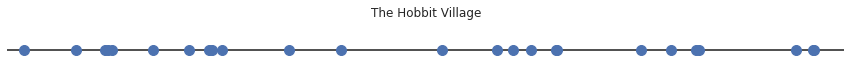

In [81]:
N = 25
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

The inhabitants of a one-dimensional village want to connect to the Internet, so they need a central service station from which a cable will stretch to all the houses in the village. Let the price of the cable to be pulled from the station to each house independently be determined by some function p(d) . Then it is clear that the village will have to pay the following amount for access to the World Wide Web:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
$w$ - station location, $x_i$ - location of $i$ house.

Write analytical solution $w^*$ for minimization $P(w,x)$, if $p(d) = d^2$

Для целевой функции:
$$
L(w)=\sum_{i=1}^N (w-x_i)^2 = \sum_{i=1}^N w^2+ x_i^2 - 2 w x_i
$$
имеем:
$$
\frac{d L}{d w} = 2\sum_{i=1}^n w - x_i
$$
или:
$$
w^* = \frac{1}{N} \sum_{i=1}^N x_i
$$
Легко убедиться, что $w^*$ точка минимума: при $w < w^*$ производная меньше 0 и наоборот при $w > w^* $.

Write loss function $P(x,w)$

чтобы избежать путаницы я добавил в название функций соответствующую метрику

In [82]:
def P_d2 (w, x):
    ans = 0.0
    for it in x:
        ans += (it - w)**2
    return ans    

Plot loss function on the range $(0, l)$

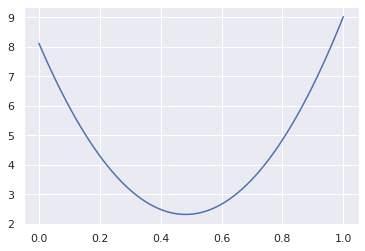

In [83]:
t_sharp = np.linspace (0, l, 100)
Y_Data = [ P_d2(w, x) for w in t_sharp  ]
plt.plot(t_sharp, Y_Data)

Write gradient of loss function

In [84]:
def dP_d2 (w, x):
    return 2*( len(x)*w - sum(x))

Plot gradient of loss function on the range $(0,l)$. Which point on the graph is of particular interest? Why?

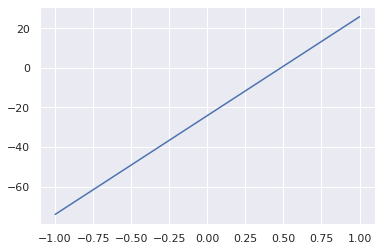

In [85]:
t_sharp = np.linspace (-1, l, 100)
Y_Data = [ dP_d2(w, x) for w in t_sharp  ]
plt.plot(t_sharp, Y_Data)

Нас интересует единственный нуль производной, являющейся точкой минимума, объяснение см. выше

Write function `gradient_descent`, which returns $w_k$ after a fixed number of steps.   

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [86]:
def gradient_descent_d2(x, dP, w0, mu, Nsteps):
    wk = w0
    for k in range( 1, Nsteps+1):
        wkk = wk - mu * dP_d2( w0, x )
        wk = wkk
    return wk

Modify `gradient_descent` to return all optimization trajectory.
Plot loss function trajectory for the following learning rates $\mu = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$.   
Draw conclusions.

0.4819764156998415


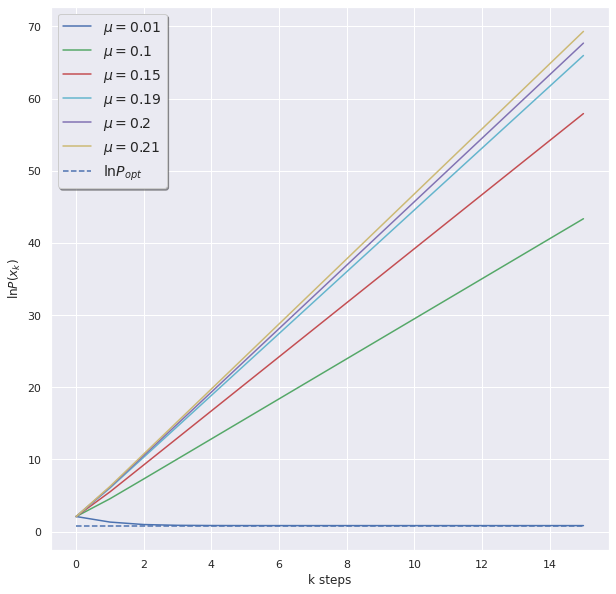

In [87]:
w_opt = sum(x) / N
Nsteps = 15
step = np.linspace(0, Nsteps, Nsteps+1)
fig, ax = plt.subplots()

def draw_trajectory (mu, color) :
    wk = 0
    trajectory = [ P_d2(wk, x) ]
    for k in range(1, Nsteps+1) :
        wk -= mu * dP_d2( wk, x )
        trajectory.append( P_d2(wk, x) )
    ax.plot(step,np.log ( trajectory ), color, label = '$\mu=$'+str(mu)  )   

draw_trajectory (0.01, 'b')
draw_trajectory (0.1, 'g')
draw_trajectory (0.15, 'r')
draw_trajectory (0.19, 'c')
draw_trajectory (0.20, 'm')
draw_trajectory (0.21, 'y')

temp = [ np.log( P_d2(w_opt,x) ) for it in step ]
ax.plot (step , temp, '--', label ='$ \ln P_{opt} $')

ax.legend(shadow = True, fontsize = 14)

ax.set_xlabel('k steps')
ax.set_ylabel('$\ln P(x_k)$')

fig.set_figwidth(10)
fig.set_figheight(10) 

print(w_opt)

0.6061180700603133


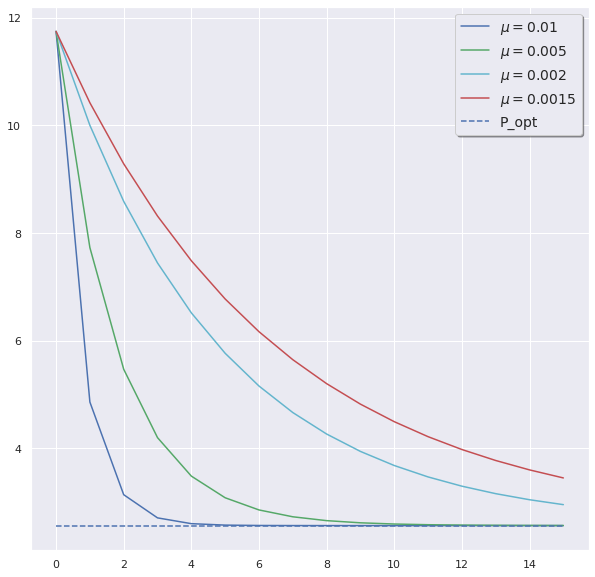

In [59]:
w_opt = sum(x) / N
Nsteps = 15
step = np.linspace(0, Nsteps, Nsteps+1)
fig, ax = plt.subplots()

def draw_trajectory (mu, color) :
    wk = 0
    trajectory = [ P_d2(wk, x) ]
    for k in range(1, Nsteps+1) :
        wk -= mu * dP_d2( wk, x )
        trajectory.append( P_d2(wk, x) )
    ax.plot(step, ( trajectory ), color, label = '$\mu=$'+str(mu)  ) 

draw_trajectory (0.01, 'b')
draw_trajectory (0.005, 'g')
draw_trajectory (0.002, 'c')
draw_trajectory (0.0015, 'r')

temp = [ P_d2(w_opt,x) for it in step ]
ax.plot (step , temp, '--', label ='P_opt')

ax.legend(shadow = True, fontsize = 14)

fig.set_figwidth(10)
fig.set_figheight(10) 

print(w_opt)

Я дополнительно добавил еще один график с "маленькими" $\mu$. О обоих графиков есть общее значение $\mu =0.01$, при больших $\mu$ град. спуск расходится, т.к. шаг слишком большой, мы "перепрыгиваем" "целевую точку" и в результате только ухудшаем положением. При малых $\mu$ мы сходимся, но при "слишком маленьких" $\mu$ сходимость может быть весьма долгой

The village decided to lay cable using new technology. That's why the price of the cable changed to:

$$
p(d) = |d|
$$

Write new function `P`, `dP`. Plot graphs for various $x$ and $w$.

In [60]:
mzero = 1e-7

def P_abs(w, x):
    ans = 0.0
    for it in x :
        ans += np.abs( w- it )
    return ans

def sub_d_abs(w, x0):
    if w - x0 > 1e-7:
        return 1
    if x0 - w > 1e-7:
        return -1
    return np.random.uniform(-1, 1)
    #return 0

def dP_abs(w, x):
    ans = 0.0
    for it in x:
        ans += sub_d_abs(w, it)
    return ans


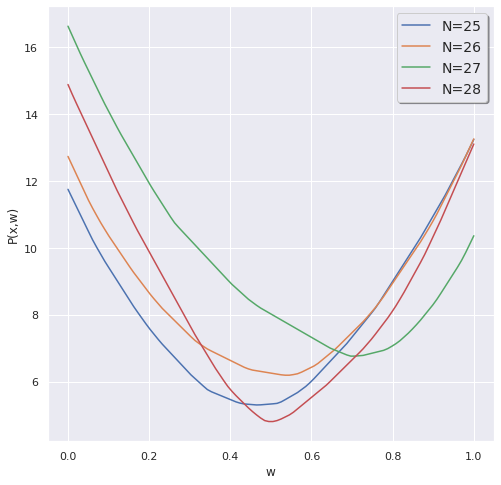

In [61]:
fig, ax = plt.subplots()

t_sharp = np.linspace (0, l, 100)
for i in range(25, 29):
    x_temp = np.random.rand(i)*l
    Y_Data = [ P_abs(w, x_temp) for w in t_sharp  ]
    ax.plot(t_sharp, Y_Data, label='N='+str(i))   

ax.legend(shadow = True, fontsize = 14)  

ax.set_xlabel('w')
ax.set_ylabel('P(x,w)')

fig.set_figwidth(8)
fig.set_figheight(8) 

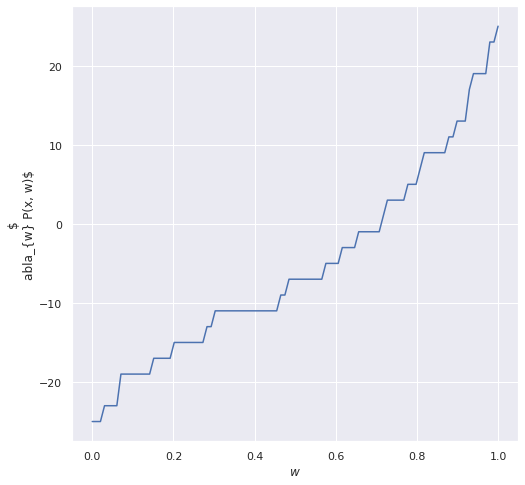

In [62]:
fig, ax = plt.subplots()

w_sharp = np.linspace (0, l, 100)
Y_Data = [ dP_abs( w, x) for w in w_sharp  ]
ax.plot(w_sharp, Y_Data)   

ax.set_xlabel('$w$')
ax.set_ylabel('$\nabla_{w} P(x, w)$')  
fig.set_figwidth(8)
fig.set_figheight(8) 

Write new analytical solytion $w^*$

Сначала рассмотрим $N=2, x = [a, b], a < b$, тогда, очевидно, любое и только такие $w: a \leq w \leq b$ есть минимум (то есть сумма растояний инварианта внутри отрезка). В случае $N=3: a < b < c$, минимум уже строго определен $w = b$. Обобщая, получаем следующие:

1) N-- нечетно, тогда оптимальное это медианная точка

2) N -- четное, тогда найдем "медианный отрезок" т.е., если иттеративно отсекать пару самая левая + самая правая точка, этот отрезок останется последним. тогда любое $w$ из отрезка есть минимум.

Plot loss trajectory for new $p(d)$.

0.7093628814162727


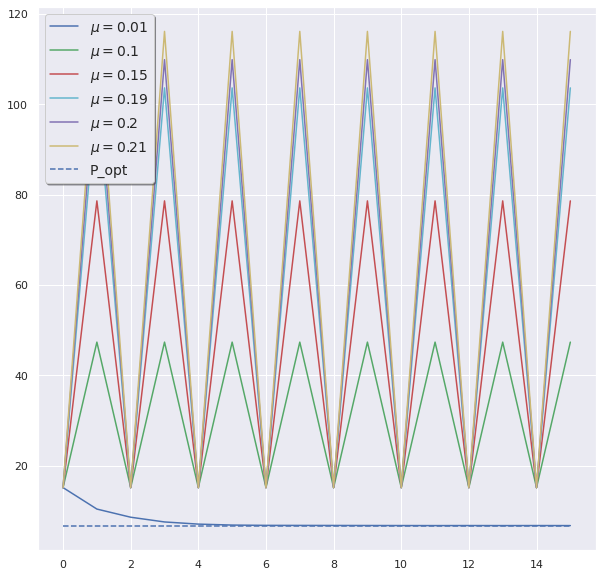

In [63]:
from copy import deepcopy

def P(w, x):
    ans = 0
    for it in x :
        ans += np.abs( w- it )
    return ans


def get_w_opt_abs (x):
    x_c = deepcopy(x)
    x_c = np.sort(x_c)
    k = int(N / 2)
    return x_c[k]

Nsteps = 15
w_opt = get_w_opt_abs(x)
step = np.linspace(0, Nsteps, Nsteps+1)
fig, ax = plt.subplots()

def draw_trajectory (mu, color) :
    w0 = 0
    trajectory = [ P_abs(w0, x) ]
    for k in range(1, Nsteps+1) :
        w0 -= mu * dP_abs( w0, x )
        trajectory.append( P_abs(w0, x) )
    ax.plot(step,trajectory, color, label = '$\mu=$'+str(mu)  )   

draw_trajectory (0.01, 'b')
draw_trajectory (0.1, 'g')
draw_trajectory (0.15, 'r')
draw_trajectory (0.19, 'c')
draw_trajectory (0.20, 'm')
draw_trajectory (0.21, 'y')

temp = [ P_abs(w_opt,x) for it in step ]
ax.plot (step , temp, '--', label ='P_opt')

ax.legend(shadow = True, fontsize = 14)

fig.set_figwidth(10)
fig.set_figheight(10) 
print(w_opt)


Здесь мы видим, что опять минимальный $\mu$ сходится. Рассмотрим остальные, этот эффект можно объяснить так: мниимум представляет из-за "чашку", "лунку", какой-то формы. Если $\mu$ соизмерима с "диаметром лунки", то $x_k$ будет просто "переваливаться" с одного края на другой, при относительно небольшом изменении значения целевой функции

After several years, the goverment propose to destroy the first station but choose locations for two new stations. In this conditions cost of connecting all house calculated by new formula:

$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

Write new `P`, `dP`. 

In [64]:
def P_minabs(w1, w2, x):
    ans = 0.0
    for it in x :
        ans = ans + minimum( abs( w1-it ), abs( w2-it ) )
    return ans

def dP_minabs(w1, w2, x):
    grad =[0.0, 0.0]
    for it in x:
        if abs(it-w1) - abs(it-w2) > 1e-7:
            grad[1] += sub_d_abs( w2, it )
        if abs(it-w2) - abs(it-w1) > 1e-7:
            grad[0] += sub_d_abs( w1, it )
        if  abs( abs(it-w2) - abs(it-w1) ) < 1e-7:
            r_temp = np.random.uniform(-1, 1)
            grad[0] += np.random.uniform(-1, 1)
            grad[1] += np.random.uniform(-1, 1) 
    return grad             

Plot  $P(w_1, w_2), \nabla P(w_1, w_2)$ for different number of houses $N$. Comment on what happens as you increase $N$.

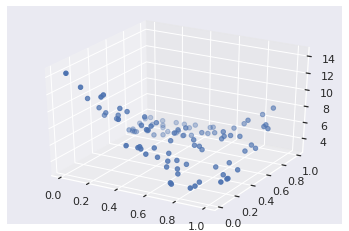

In [65]:
np.random.seed(111)
X_Date = []
Y_Date = []
Z_Date = []

for i in range(100):
    w1 = np.random.uniform(0, 1)
    w2 = np.random.uniform(0, 1)
    X_Date.append(w1)
    Y_Date.append(w2)
    Z_Date.append( P_minabs(w1, w2, x) )


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_Date, Y_Date, Z_Date )


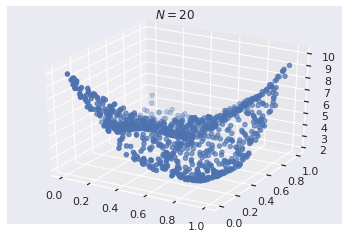

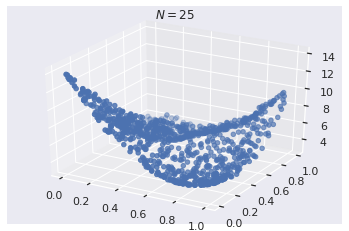

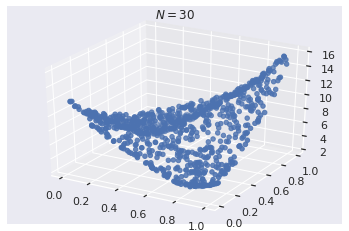

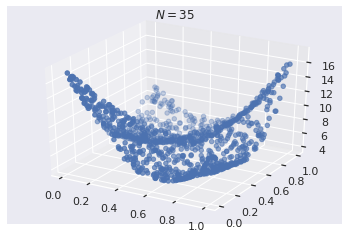

In [66]:
def draw_gpaph ( x_temp ):
    X_Date = []
    Y_Date = []
    Z_Date = []

    for i in range(1000):
        w1 = np.random.uniform(0, 1)
        w2 = np.random.uniform(0, 1)
        X_Date.append(w1)
        Y_Date.append(w2)
        Z_Date.append( P_minabs(w1, w2, x_temp ) )


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_Date, Y_Date, Z_Date )
    ax.set_title('$N=$'+str(len(x_temp)))

for n in range(20, 36, 5):
    x_temp = np.random.rand(n)
    draw_gpaph ( x_temp )


Признаюсь, я очень плохо воспринимаю 3d графики, но мне кажется, что с ростом $N$ графики становятся более крутыми, т.е. увеличивается градиент и увеличиваются максимальное значение на краях, форма графики впринципе сохраняется, естественно с небольшими изменеями.

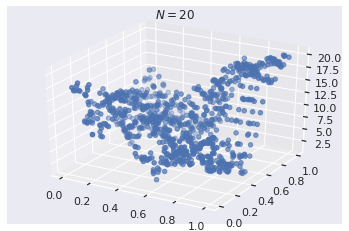

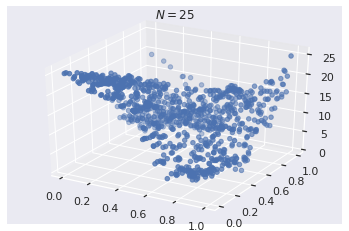

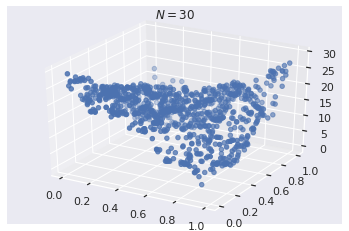

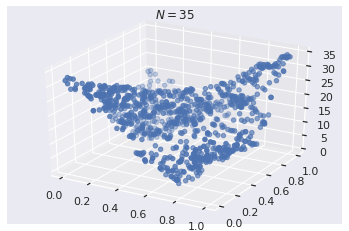

In [67]:
def draw_gpaph ( x_temp ):
    X_Date = []
    Y_Date = []
    Z_Date = []

    for i in range(1000):
        w1 = np.random.uniform(0, 1)
        w2 = np.random.uniform(0, 1)
        X_Date.append(w1)
        Y_Date.append(w2)
        Z_Date.append( np.linalg.norm( dP_minabs(w1, w2, x_temp ) ) )


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_Date, Y_Date, Z_Date )
    ax.set_title('$N=$'+str(len(x_temp)))

for n in range(20, 36, 5):
    x_temp = np.random.rand(n)
    draw_gpaph ( x_temp )


Действительно, мы видим большой градиаент на краях, где $w_1 ≃ w_2$ , при этом на крях $ w_1 = 1, w_2 = 0 $ и наоборот градиент спадает, что согласуется с логикой. Логичнее ставить вышки примерно с двух разных концов

Write new `gradient_descent`, which returns the entire optimization trajectory $(w_k)$ after a fixed number of steps and draws the process on the graphs $P$ and $\nabla P$ that were above. To ease visualization try to use `ax.quiver`

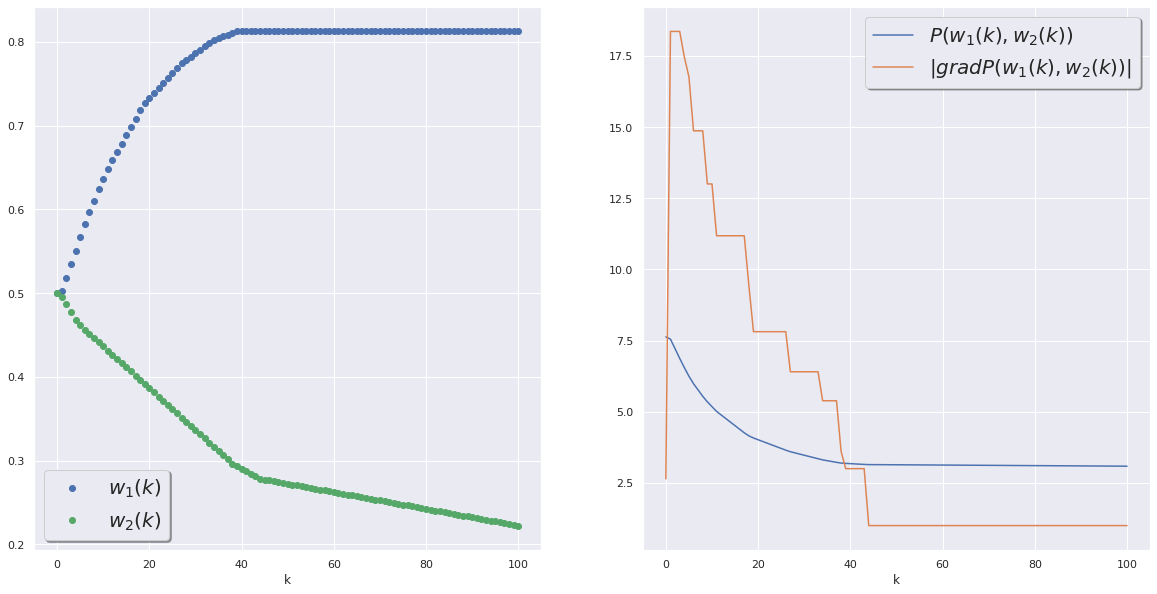

In [68]:
def grad_norm_minabs( w1, w2, x):
    grad = dP_minabs(w1, w2, x)
    return np.linalg.norm(grad)

fig, axes = plt.subplots(1, 2)

def gradient_descent_minabs(x, w1 , w2 , mu, Nsteps):
    trac1 = [w1]
    trac2 = [w2]
    tracP = [ P_minabs(w1, w2, x) ]
    trac_grad = [ grad_norm_minabs(w1, w2, x)  ]
    for i in  range(1, Nsteps+1):
        gr = dP_minabs (w1, w2, x)
        w1 -= gr[0] * mu
        w2 -= gr[1] * mu
        trac1.append( w1 )
        trac2.append( w2 )
        tracP.append(P_minabs(w1, w2, x))
        trac_grad.append( grad_norm_minabs(w1, w2, x) )     
    
    N_sharp =np.linspace(0, Nsteps, Nsteps+1)
    axes[0].plot( N_sharp,  trac1, 'ob', label='$w_1(k)$' )
    axes[0].plot( N_sharp,  trac2, 'og', label='$w_2(k)$' )
    
    axes[1].plot( N_sharp, tracP, label='$P(w_1(k), w_2(k))$')
    axes[1].plot( N_sharp, trac_grad, label='$ \| grad P(w_1(k), w_2(k)) \| $')
    
    axes[0].legend( shadow = True, fontsize = 20)
    axes[0].set_xlabel('k')
    axes[1].legend( shadow = True, fontsize = 20)
    axes[1].set_xlabel('k')
    fig.set_figwidth(20)
    fig.set_figheight(10) 

gradient_descent_minabs(x, 0.5 , 0.5 , 0.001, 100)

Я сделал график в другом формате, мне он кажется более информативным, см. легенду графика. Для графика отражен случай когда $w_1 (0) = w_2 (0)$ т.к. он мне показался самым интересным, ввиду того, что в этом случае мы рисукем, что $w_1 (k) = w_2 (k)$ по всей траектории, что, не является минимум. Поэтому я решил при подсчета градиента в случае равенства передавать два разных рандомных значения, чтобы "развести"  $w_1, w_2$

Construction is almost underway, but new safety regulations do not allow stations to be on the distance more than 1/2:
 
$$
\left|w_1 - w_2\right| \leq \dfrac{l}{2}
$$

Plot our feasible set. Is it convex?

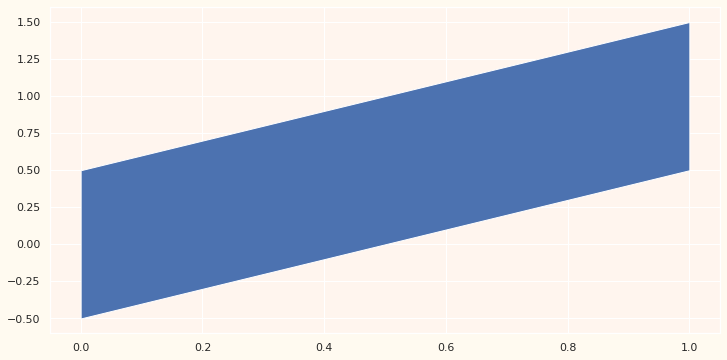

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.linspace(0, 1, 10)

y1 = x + 1/2
y2 = x - 1/2
ax.fill_between(x, y1, y2)

fig.set_figwidth(12)    
fig.set_figheight(6)    
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

Докажем выпусклость по определению. Обозначим мн-во как $S$ .Пусть $(x_1, y_1), (x_2, y_2) \in S $. Тогда:
$$
\alpha (x_1, y_1) + (1 - \alpha) (x_2, y_2) = ( \alpha x_1 + (1 - \alpha) x_2, \alpha y_1 + (1 - \alpha) y_2  ) = z (\alpha)
$$.
Проверим, что $z \in S$, т.е. $ | z_1 - z_2 | \leq l / 2 $:
$$
|z_1 - z_2 | = | α(x_1 - y_1) + (1 - α) (x_2 - y_2) | \leq a (l/2) + (1-a) (l/2) \leq l/2   
$$

В данном случае, легко видеть, что бюджетное множество представляется из себя "дорожку", ограниченную двумя прямыми: $y = x + l/2 ; y = x - l/2$. Соответственно, если точка не в бюджетном множестве, то ее проекция есть одна из проекция на граничную прямую, надо выбрать по минимуму расстояния.

Write `conditional_SGD`, which returns the entire optimization trajectory $(w_k)$ after a fixed number of steps and draws the process on the graphs $P$ and $\nabla P$ that were above.

The conditional gradient descent method consists in making a gradient step and then checking if the obtained point belongs to the feasible set. If it belongs to the target set, the algorithm continues, otherwise a projection to the feasible set is made.

In [ ]:
def conditional_SGD(x, dP_sigma, w0, mu, Nsteps, p=0.4):
    pass

In [ ]:
def projection(w):
    pass

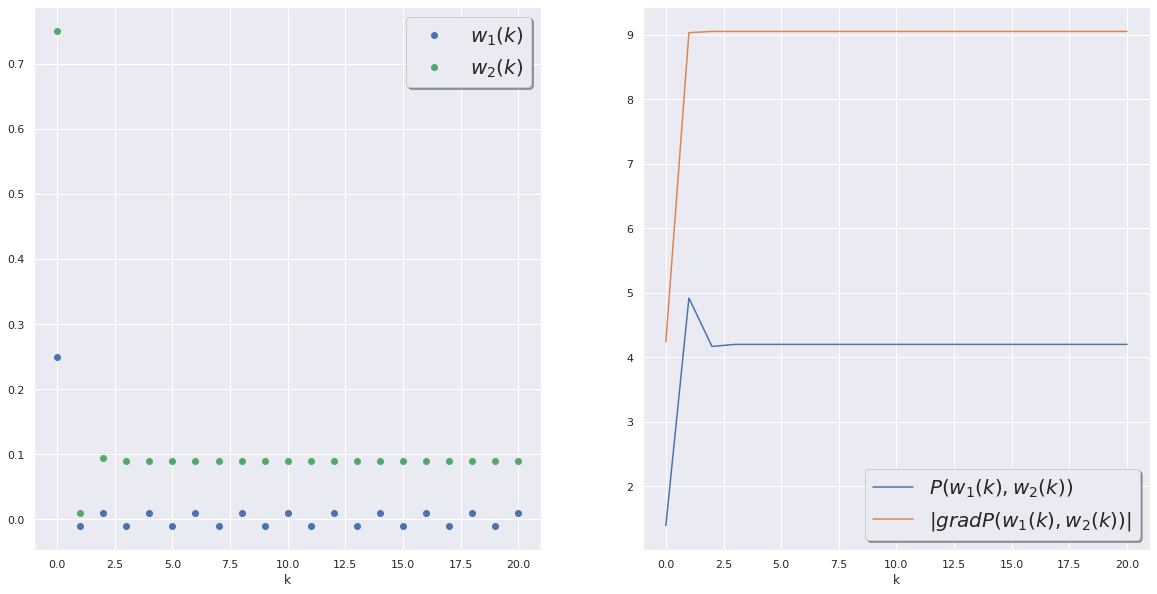

In [70]:
l=1
machine_zero = 1e-7

def distance ( a, b, c, d ):
    return ( a - c )**2 + ( b - d )**2

def projection_budget_set (z1, z2):
    if np.abs(z1 - z2 ) <= l/2 - machine_zero:
        return [z1, z2]
    S = z1 + z2
    z11 = ( S - l/2 ) / 2
    z12 = ( S + l/2 ) / 2
    z21 = ( S + l/2 ) / 2
    z22 = ( S - l/2 ) / 2
    d1 = distance (z1, z2, z11, z12 )
    d2 = distance (z1, z2, z21, z22 )
    if d1 == np.minimum( d1, d2) :
        return [z11, z12]
    else :
        return [z21, z22]    

def gradient_descent(x, w0, mu, Nsteps ):
    wk = projection_budget_set (w0[0], w0[1])
    trac1 = [ wk[0] ]
    trac2 = [ wk[1] ] 
    tracP = [ P_minabs(wk[0], wk[1], x) ]
    trac_grad = [ grad_norm_minabs( w0[0], w0[1] , x)  ]
    for i in range(1 , Nsteps+1):
        gr = dP_minabs(wk[0], wk[1], x)
        wk[0] = - mu * gr[0]
        wk[1] = - mu * gr[1]
        wk_proj = projection_budget_set ( wk[0], wk[1] )
        wk[0] = wk_proj[0]
        wk[1] = wk_proj[1]
        trac1.append (wk[0])
        trac2.append (wk[1])
        tracP.append(P_minabs(wk[0], wk[1], x))
        trac_grad.append( grad_norm_minabs( wk[0], wk[1] , x) )   
 
    fig, axes = plt.subplots(1, 2)
    N_sharp =np.linspace(0, Nsteps, Nsteps+1)
    axes[0].plot( N_sharp,  trac1, 'ob', label='$w_1(k)$' )
    axes[0].plot( N_sharp,  trac2, 'og', label='$w_2(k)$' )
    
    axes[1].plot( N_sharp, tracP, label='$P(w_1(k), w_2(k))$')
    axes[1].plot( N_sharp, trac_grad, label='$ \| grad P(w_1(k), w_2(k)) \| $')
    
    axes[0].legend( shadow = True, fontsize = 20)
    axes[0].set_xlabel('k')
    axes[1].legend( shadow = True, fontsize = 20)
    axes[1].set_xlabel('k')
    fig.set_figwidth(20)
    fig.set_figheight(10) 


Nstep = 20
gradient_descent (x, [0.1, 0.9], 0.01, Nstep )






We have same loss function

$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|),
$$

where $p(d) = d^2$

Write functions `P, dP, ddP`. `ddP` has to return hessian of loss function

In [88]:
def ddP_d2(w, x):
    return 2*len(x)

Plot `ddP` on the range  (0,l)

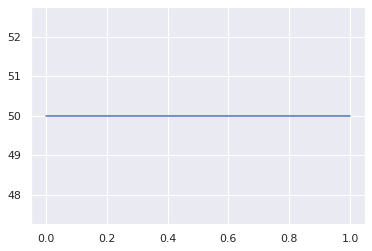

In [89]:
t_sharp = np.linspace(0, l, 100)
ddP_value = [ ddP_d2(it, x) for it in t_sharp  ]
plt.plot( t_sharp, ddP_value )

Write function `newton_descent`, which return all optimization trajectory. Update rule:

$$
w_{i+1} = w_{i} - \nabla^{2} f\left(w_{i}\right)^{-1} \nabla f\left(w_{i}\right)
$$

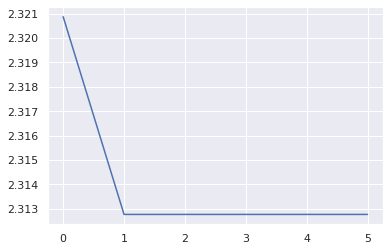

In [90]:
def newton_descent(x, w0, Nsteps):
    trajectory = [w0]
    wk = w0
    for i in range(1, Nsteps+1):
        wkk = wk - dP_d2(wk,x) / ddP_d2(wk,x)
        trajectory.append(wkk)
        wk = wkk
    return trajectory

Nstep = 5
res = newton_descent (x , 0.5 , Nstep)
N_sharp = np.linspace( 0, Nstep, Nstep+1 )
Value = [ P_d2(it ,x ) for it in res ]
plt.plot(N_sharp, Value)    

Investigate the behavior of Newton's method depending on the different initial point $w_0$.

Вообще, легко показать, что метод сойдется за один шаг:
$$
w_1 = w_0 - \frac{ 2 \sum_{i=1}^N w_0 - x_i }{2N} = \frac{1}{N} \sum_{i=1}^N x_i
$$
что и является минимумом.

Не совсем понимаю, что требуется в качестве программы

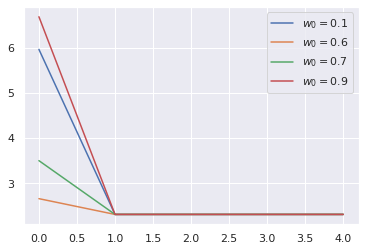

In [95]:
fig, ax = plt.subplots()

def draw_trac (w0) :
    trac = newton_descent(x, w0, 4)
    N_sharp = np.linspace( 0, 4, 5 )
    Value = [ P_d2(it ,x ) for it in trac ]
    ax.plot(N_sharp, Value, label='$w_0=$'+str(w0)) 
    ax.legend()

draw_trac (0.1)
draw_trac (0.6)      
draw_trac (0.7)
draw_trac (0.9)

Write function `multi_newton`, which solve 2D task:
$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

with  $p(d) = d^3$ using Newton method and return optimization trajectory. Compare results with gradient descent.

In [ ]:
def P_d3(w1, w2, x):
    ans = 0.0
    for it in x:
        ans += minimum ( abs(w1 - it), abs(w2-it) )**3
    return ans

def dP_d3(w1, w2, x):
    grad = [0.0, 0.0]
    for it in x:
        d1 = abs(it - w1)
        d2 = abs( it - w2 )
        if d2 - d1 > 1e-7:
            grad[0] += 3 * d1 * (w1 - it)
        if d1 - d2 > 1e-7:
            grad[1] += 3 * d2 * (w2 - it)
        if abs (d1 - d2) <= 1e-7:
            grad[0] +=  np.random.uniform(-1, 1)
            grad[1] +=  np.random.uniform(-1, 1) 
    return grad           

                
def ddP_d3(w1, w2, x):
    ggrad = [0.0, 0.0]
    for it in x:
        d1 = abs(it - w1)
        d2 = abs( it - w2 )
        if d2 - d1 > 1e-7:
            ggrad[0] += 6 * abs( w1 - it )
        if d1 - d2 > 1e-7:
            ggrad[1] += 6 *  abs(w2 - it ) 
    return ggrad



In [ ]:
def multi_newton(x, w0, Nsteps):
    wk = w0
    trajectory = [ wk ]
    for it in range(1, Nsteps+1):
        grad = dP_d3 (wk[0] , wk[1] , x)
        
        ggw1 = 0.0
        if grad[0] != 0.0:
            ggw1 = ddP_d3 (wk[0] , wk[1] , x)[0]
        ggw2 = 0.0
        if grad[1] != 0.0 :
            ggw2 = ddP_d3 (wk[0] , wk[1] , x)[1]
        
        wkk = [wk[0] , wk[1]]
        if ggw1 != 0.0 :    
            delta1 = grad[0] / ggw1
            wkk[0] = wk[0] - delta1
        if ggw2 != 0.0 :    
            delta2 = grad[1] / ggw2
            wkk[1] = wk[1] - delta2  
        trajectory.append(wkk)         
        wk = wkk
    return trajectory

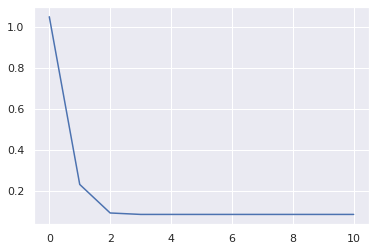

In [ ]:
N=10
trac = multi_newton(x, [0.3, 0.4], N)
value = []
for w in trac:
    value.append( P_d3( w[0], w[1], x) )
N_sharp = np.linspace(0, N, N+1 )
plt.plot( N_sharp, value)     

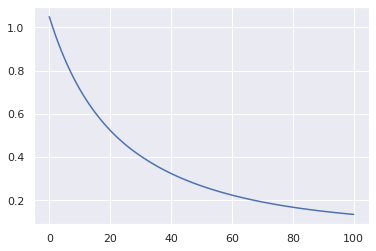

In [ ]:
def  grad_descent ( x, w0, mu, N ):
    wk = w0
    trac = [ wk ]
    for i in range(1, N+1):
        grad = dP_d3 (wk[0] , wk[1] , x)
        wkk = [wk[0], wk[1]]
        wkk[0] -= mu * grad[0]
        wkk[1] -= mu * grad[1]
        trac.append(wkk)
        wk = wkk
    return trac    
N = 100
trac= grad_descent (x, [0.3, 0.4], 0.001, N)
value = []
for w in trac:
    value.append( P_d3( w[0], w[1], x) )
N_sharp = np.linspace(0, N, N+1 )
plt.plot( N_sharp, value)   

Видим, что м. Ньютона фактически за две итерации находит минимум и после этого его значение практически не меняется. Градиентный спуск в этом случае, исходя из графика видет себя достаточно стабильно, но обеспечивает гораздо более медленную сходимость

## Functional class
A function is said to belong to the class $f \in C^{k,p}_L (Q)$ if it $k$ times is continuously differentiable on $Q$ and the $p$th derivative has a Lipschitz constant $L$. 

$$
\||\nabla^p f(x) - \nabla^p f(y)\| \leq L \|x-y\|, \qquad \forall x,y \in Q
$$

The most commonly used $C_L^{1,1}, C_L^{2,2}$ on $\mathbb{R}^n$. 
Note that:
* $p \leq k$
* If $q \geq k$, then $C_L^{q,p} \subseteq C_L^{k,p}$. The higher the order of the derivative, the stronger the constraint (fewer functions belong to the class)

Prove that the function belongs to the class $C_L^{2,1} \subseteq C_L^{1,1}$ if and only if $\forall x \in \mathbb{R}^n$:

$$
\||\nabla^2 f(x)\| \leq L
$$

Prove also that the last condition can be rewritten, without generality restriction, as follows:

$$
-L I_n \preceq \nabla^2 f(x) \preceq L I_n
$$

Note: by default the Euclidean norm is used for vectors and the spectral norm is used for matrices.

Покажем, что требуемое не выполняется. Построим такую $G(x)$, $x \in \mathbb{R}$, что $ |G''(x)| \leq 1 \forall x \in \mathbb{R}$, при этом функция $G''$ терпит разрыв, т.е. $G ∉ C^2$. Построим $G(x)$ от обратного.
Положим:
$$
f(x) = \left\{ \begin{aligned}
                &\sin \left( \frac{1}{x^3}\right) , x \neq 0 \\
                &0 , x = 0 
            \end{aligned} \right.
$$

Также рассмотрим
$$
F(x) = \left\{ \begin{aligned} 
         &\int_{0}^{x} f(t)dt , x > 0 \\
          &0 , x = 0 \\
          &-\int_{-|x|}^0 f(t) dt, x < 0  
        \end{aligned} \right.
$$

$f$ имеет только один разрыв в $x=0$ и ограничена $1$ на $\mathbb{R}$, откуда по критерию Лебега об интегрируемости по Риману $F(x)$ существует при всех $x \in \mathbb{R}$ и $F'(x) = f(x), \forall x \neq 0$. Исслудуем производную в 0. Рассмотрим
$$
\lim_{\Delta \to 0^+} \frac{F(\Delta) - F(0)}{\Delta}
$$
Докажем, что этот предел есть $0$ (заметим, что если это так, то, в силу симметрии, предел при $\Delta \to 0^{-}$ тоже нулевой)
$$
\lim_{\Delta \to 0^+}  \frac{1}{\Delta} \int_{0}^{\Delta} \sin( t^{-3} )dt
$$
Сделаем замену переменных:
$$
\int_{0}^{\Delta} \sin( t^{-3} )dt = \frac{-1}{3} \int_{Δ^{-3}}^{∞} \frac{\sin x}{x^{4/3}} dx
$$
Сделаем замену $y = Δ^{-1}$, тогда исходный предел эквивалентен (если точнее, перед пределом есть константа, но т.к. мы доказываем, что предел нуль константа не важна):
$$
\lim_{y \to + ∞} y \int_{y^3}^{\infty}  \frac{\sin x}{x^{4/3}} dx
$$
Проинтегрируем по частям:
$$
\lim_{y \to + ∞} y \left( \frac{\cos(y^3)}{y^{4/3}} - \frac{4}{3} \int_{y^3}^∞ \frac{\cos x}{ x^{7/3}} dx  \right) = -\frac{4}{3} \lim_{y \to + ∞} y \left( \int_{y^3}^∞ \frac{\cos x}{ x^{7/3}} dx  \right) 
$$
$$
\left| y  \int_{y^3}^∞ \frac{\cos x}{ x^{7/3}} dx \right| \leq  y \int_{y^3}^\infty \frac{1}{x^{7/3}} dx = \frac{3}{4 y^4}
$$
Откуда в пределе, получаем $0$.

Таким образом, $F(x)$ непрерывна и дифференцируема $F'(x) = f(x) ∀ x \in \mathbb{R}$.

Тогда, мы можем построить $G(x): G'(x) = F(x) ∀ x \in \mathbb{R}$ положив:
$$
G(x) = \left\{ \begin{aligned}
            & \int_{0}^x F(t) dt, x > 0 \\
            & 0 , x = 0 \\
            & -\int_{-|x|}^0 F(t) dt, x < 0
        \end{aligned} \right.
$$
Для любого $x$ каждый соотвествующий интеграл сходится.

Итак, имеем $G''(x) = f(x)$, противоречие с условием задачи.

Вообще, кажется я могу догадаться, какое решение здесь имелось ввиду.

Представим функцию в виду:
$$
f(x) = f(0) + \int_{0}^x f'(t) dt
$$
В случае фуекции многих переменных интеграл имеется ввиду как поокординатный. 

Или, с заменой переменных
$$
f'(y) = f'(x) + \int_{0}^1  f''( x + \alpha (y-x) ) (y-x) d α =  f'(x) +  (y-x) \int_0^1 f''( x + \alpha (y-x) ) d α
$$
откуда, если подставить вторую производную:
$$
\|  f'(y) - f'(x) \| \leq \| y - x \|  \int_{0}^1 | f'' \left(  α y + (1 - \alpha) x  \right) | d \alpha 
$$
Замення под интегралом на $L$ получаем требуемое.

Обратно, воспользуемся суть тем же разложением:
$$
y_i ( f'(x_i+ α y_i) - f'(x_i) ) = \int_0^{α} f''(x_i + γ y_i ) d γ
$$
$α$ -- вещественный параметр, $y$ -- произвольный вектор, производную вдоль направления которого мы рассматриваем.

По условию:
$$
\|  f'(x+ α y) - f'(x)\| \leq L | α | \| y \| 
$$
Суммируя по всем  $i$:
$$
<\frac{y}{ \| y \| },  \int_0^{α} f''(x + γ y) d γ > \leq  α L 
$$
Предположим, что где-то $ \| f''(x_0 + γ y) \| > L $, тогда ввиду непрерывности это неравенство распространяется на некоторую окрестность $x_0$, выбирая $y$ такой, чтобы неравенство было сохранено получаем противоречие

## How condition number affects gradient optimization

 Consider a function of two variables:

$$
f(x_1, x_2) = x_1^2 + k x_2^2,
$$

where $k$ is some parameter

In [23]:
def f(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    x_1, x_2 = x
    return x_1**2 + k*x_2**2

def df(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    return np.array([2*x[0], 2*k*x[1]])


In [24]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def plot_3d_function(x1, x2, f, title, *f_params, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1  = x1.max()
    up_lim_2  = x2.max()

    X1,X2 = np.meshgrid(x1, x2) # grid of point
    Z = f((X1, X2), *f_params) # evaluation of the function on the grid
    
    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)

    #===============
    #  First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, 
                        cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, f(minima_), 'r*', markersize=10)
    
    

    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(Z,cmap=plt.cm.RdBu,  extent=[low_lim_1, up_lim_1, low_lim_2,
                                                up_lim_2])
    cset = ax.contour(x1, x2,Z,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel(f'$x_1$')
    ax.set_ylabel(f'$x_2$')
    
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)
    
    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')

    plt.show()

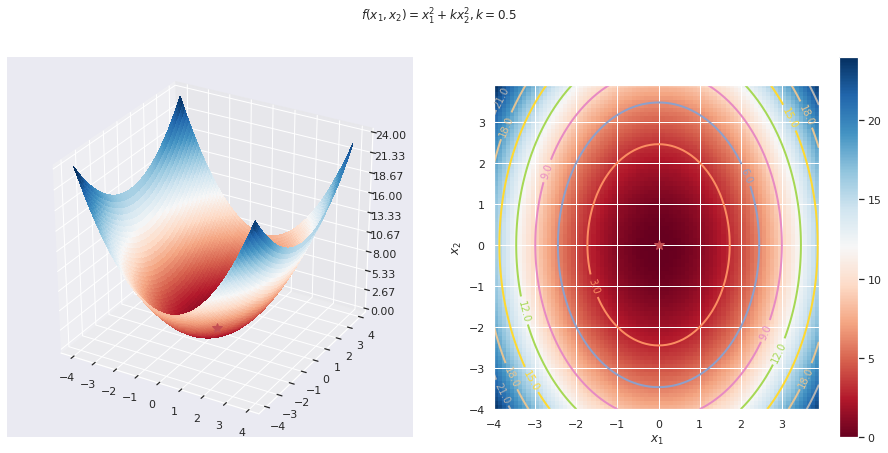

In [25]:
up_lim  = 4
low_lim = -up_lim
x1 = np.arange(low_lim, up_lim, 0.1)
x2 = np.arange(low_lim, up_lim, 0.1)
k=0.5
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'

plot_3d_function(x1, x2, f, title, k, minima=[0,0])

For example, steepest descent algorithm will be plotted with the following code:

Finished with 44 iterations


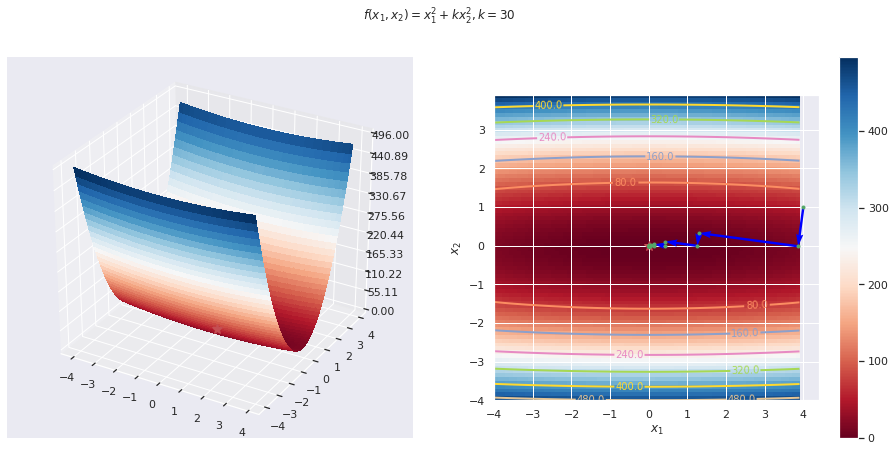

In [26]:
from scipy.optimize import minimize_scalar

def steepest_descent(x_0, f, df, *f_params, df_eps = 1e-2, max_iter = 1000):
    iterations = []
    x = np.array(x_0)
    iterations.append(x)
    while np.linalg.norm(df(x, *f_params)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x, *f_params), *f_params))
        alpha_opt = res.x
        x = x - alpha_opt * df(x, *f_params)
        iterations.append(x)
    print(f'Finished with {len(iterations)} iterations')
    return iterations

x_0 = [4,1]
k = 30
iterations = steepest_descent(x_0, f, df, k, df_eps = 1e-9)
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'

plot_3d_function(x1, x2, f, title, k, minima=[0,0], iterations = iterations)

Plot the number of iterations required for the convergence of the steepest descent algorithm (up to the condition $\|\nabla f(x_k)\| \leq \varepsilon = 10^{-7}$) depending on the value of $k$. Consider the interval $k \in [10^{-3}; 10^3]$ (it will be convenient to use the function `ks = np.logspace(-3,3)`) and plot on the X axis in logarithmic scale `plt.semilogx()` or `plt.loglog()` for double log scale.

Make the same graphs for the suitable constant stepsize. Explain the results.

Finished with 5 iterations
Finished with 5 iterations
Finished with 5 iterations
Finished with 6 iterations
Finished with 6 iterations
Finished with 6 iterations
Finished with 6 iterations
Finished with 6 iterations
Finished with 6 iterations
Finished with 6 iterations
Finished with 6 iterations
Finished with 6 iterations
Finished with 7 iterations
Finished with 7 iterations
Finished with 8 iterations
Finished with 8 iterations
Finished with 8 iterations
Finished with 8 iterations
Finished with 8 iterations
Finished with 9 iterations
Finished with 9 iterations
Finished with 9 iterations
Finished with 9 iterations
Finished with 8 iterations
Finished with 7 iterations
Finished with 7 iterations
Finished with 11 iterations
Finished with 16 iterations
Finished with 23 iterations
Finished with 33 iterations
Finished with 44 iterations
Finished with 52 iterations
Finished with 54 iterations
Finished with 54 iterations
Finished with 48 iterations
Finished with 44 iterations
Finished with 38 i

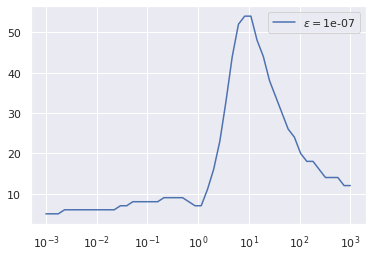

In [27]:
fig, ax = plt.subplots()
ks = np.logspace(-3,3)
def draw_gpaph ( eps ):
    Y_Date = []
    for it in ks:
        iter = steepest_descent( x_0, f, df,  it , df_eps = eps)
        Y_Date.append( len(iter) )
    #plt.title('$ \epsilon= $'+str(eps) )
    ax.plot(ks, Y_Date, label='$\epsilon=$'+str(eps))
    ax.legend()
    ax.semilogx()
draw_gpaph(1e-7)

Определим лучшую константу. Итак
$$
∇^2 f = \begin{pmatrix} 
            2 & 0 \\
            0 & 2 k
        \end{pmatrix}
$$
А это значит, спектальная норма есть $ 2 \max(1, k) $ и тогда, как обсуждалось на семинаре и в тг-чате, лучший шаг есть:
$$
\mu =  \frac{1}{ \lambda_{max} + \lambda_{min}  }  = \frac{1}{k+1}
$$
В виду сильной выпуклости. Наша задача сильна выпукла потому, что :     
$$
f(x) = x^T Q x
$$,
$$
Q = \begin{pmatrix} 
            1 & 0 \\
            0 & k
        \end{pmatrix}
$$  
полжительно определенная

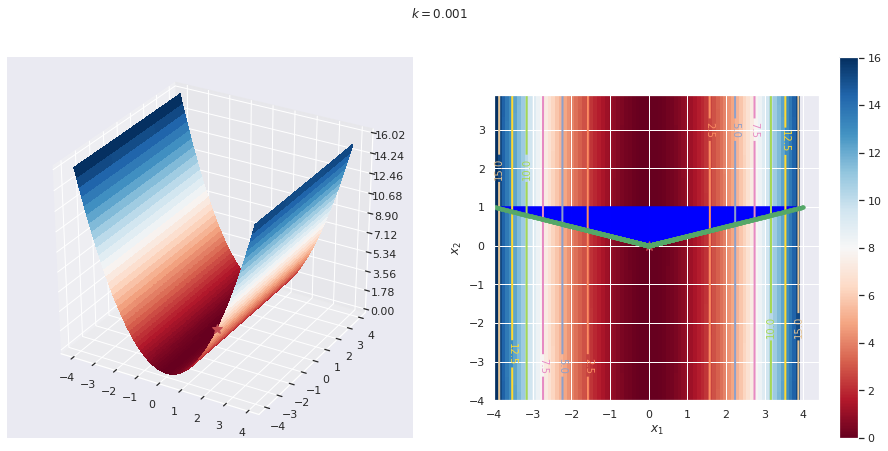

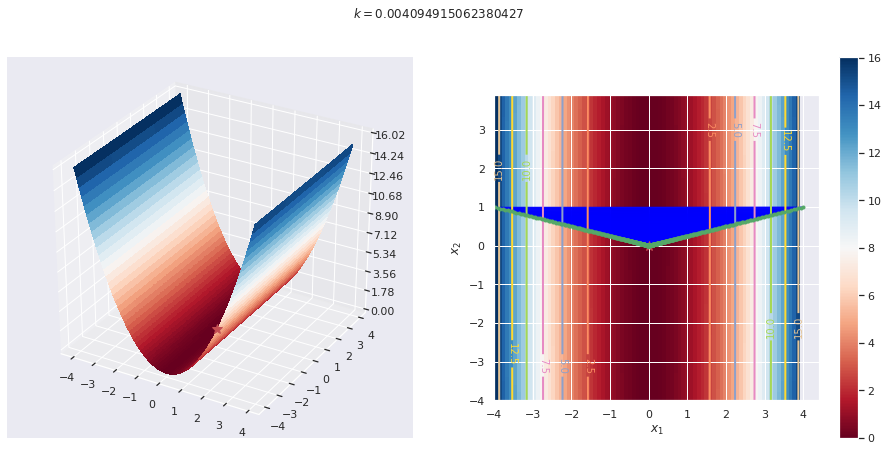

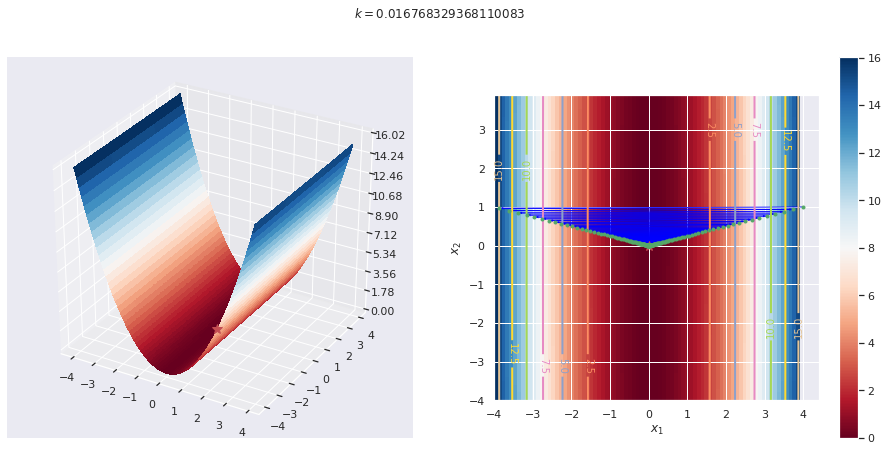

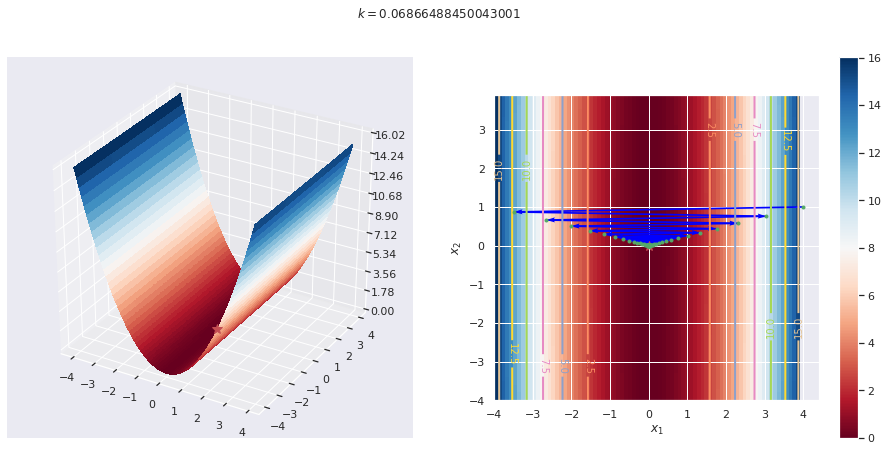

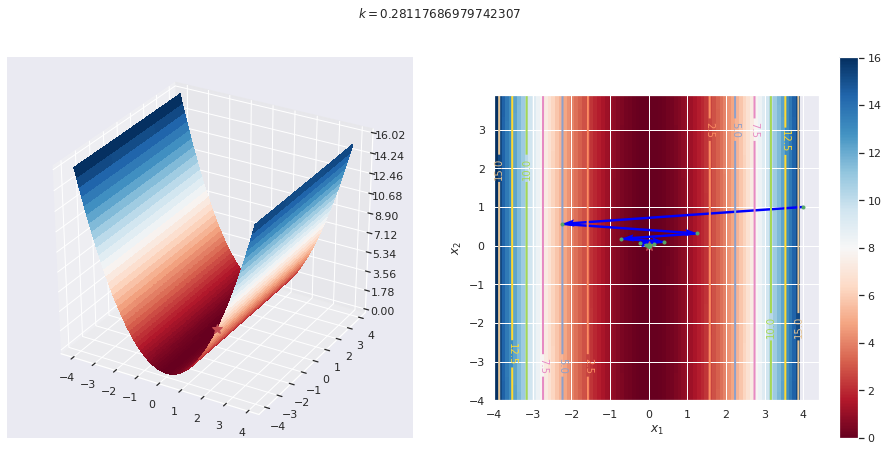

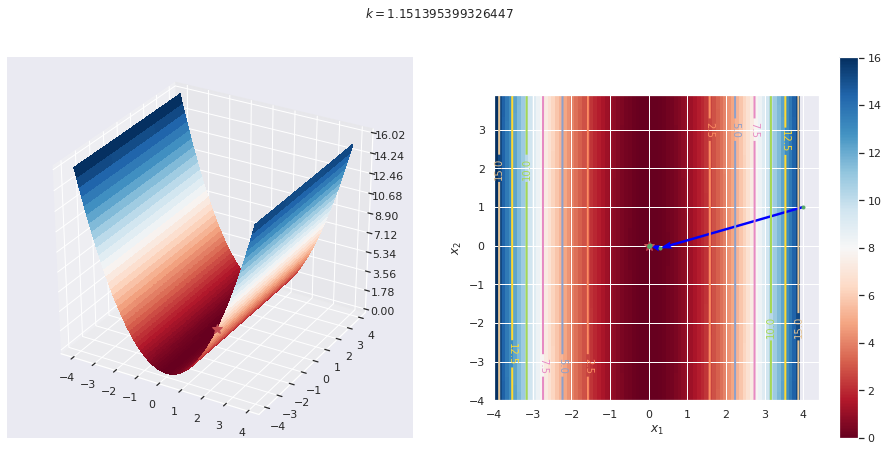

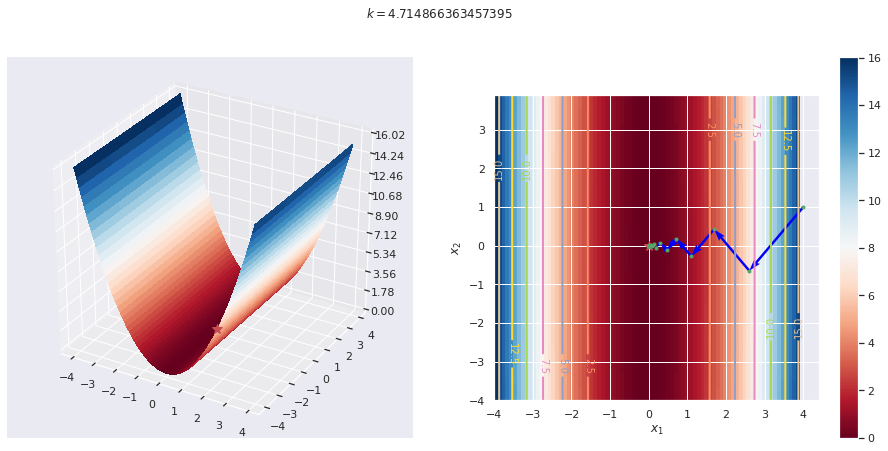

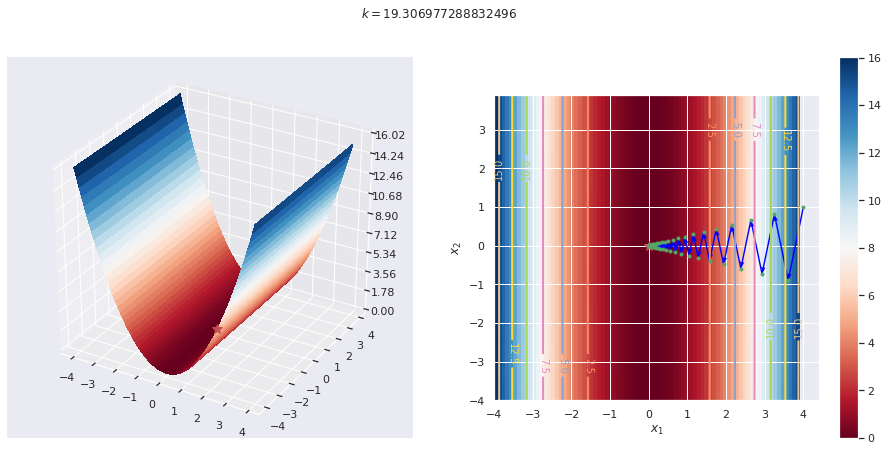

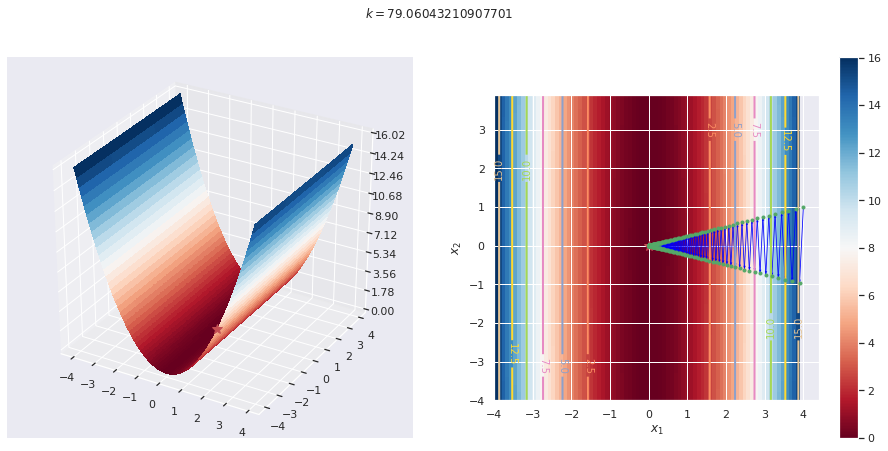

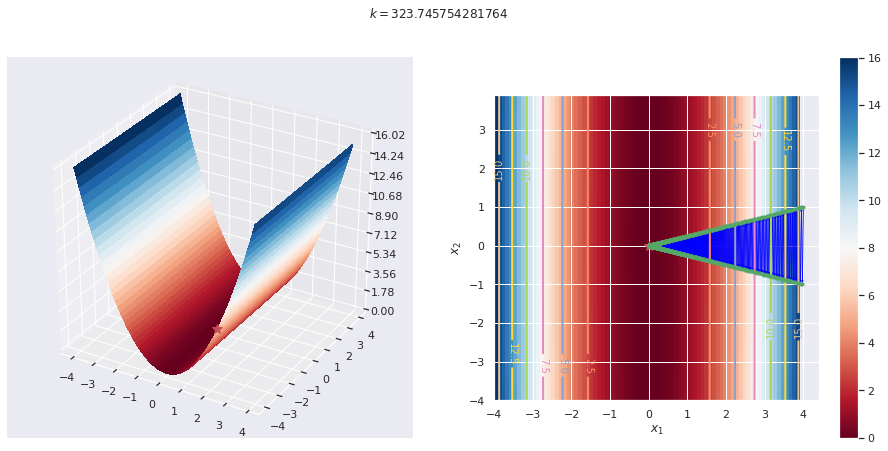

Text(0, 0.5, 'numb of iterations')

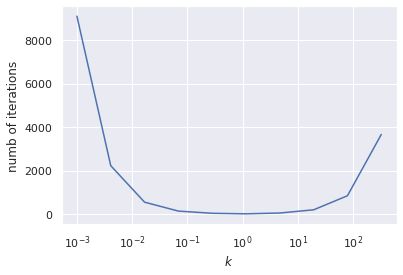

In [28]:
def grad_desc (x_0, f, df, k , *f_params):
    mu = 1/( 1 + k  )
    trac = []
    xk = x_0 
    trac.append(xk)
    while np.linalg.norm(df(xk, *f_params)) > 1e-7 :
        xkk  = xk - mu * df(xk, *f_params)
        trac.append(xkk)
        xk = xkk
    return trac


ks = np.logspace(-3,3)
ks_d = [ ks[i] for i in range(0, len(ks), 5) ]
Y_Date = []
test_iter = []
for it in ks_d :
    res = grad_desc(x_0, f, df, it ,it )
    plot_3d_function(x1, x2, f, '$k=$'+str(it) , ks[0], minima=[0,0], iterations = res ) 
    Y_Date.append(len(res))
 
plt.plot(ks_d, Y_Date )
plt.semilogx()
plt.xlabel("$k$")
plt.ylabel("numb of iterations")


Рассмотрим линии уровня, они предсталяют из себя эллипсы с диагоналями $1, k$, тогда, если $1 ≃ k$, то линии уровня близки к окружностям и градиент сходится быстро к центру, при $ 1 >> k или k << 1 $ эллипсы становятся сильно вытянутыми и шаг градиента направлен сильно в сторону ( мы это не раз обсуждали как и на семинарах так и на лекциях ). Впринципе, этот эффект даже хорошо виден на правых графиках, самых первых и самых последних, мы видим, что каждый шаг градиента идет под большим "углом атаки" на минимум. и так же видна разница между последними и первыми графиками, что градиент идет с разных траекториях, потому что от состояния $ k << 1$ мы перешли к $1 << k$ и эллипсы уровня как бы развернулись по осям

## Projected gradient descent

Find projection on the $S$ set $\pi_S (y) = \pi$ if: 

$$
S = \{x \in \mathbb{R}^n \mid Ax = b, A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^{m}\}, y \notin S
$$

Hint: Check [fmin.xyz](https://fmin.xyz) 

Легко видеть $S$--аффинное мн-во (просто см. определение). Тогда по критерию проекции $ <π-y, x- \pi> = 0$. Будем искать $\pi := y + A^T z$. Где вектор $z$ определим из условия принадлежности множеству:
$$
A \pi = Ay + (A A^T) z = b
$$
Сначала докажем, что уравнение на $z$:
$$
A A^T z = b - Ay
$$
разрешимо.
Вспомним следующую теорему из линейной алгебры:

Система $Ax=y$ имеет решение тогда и только тогда, когда  $\forall x* : A^T x* = 0 ↪ <y, x*> =0 $.

Докажу следующую лемму:
$$
A A^T z = 0 ⇒ A^T z = 0
$$

пусть $A^T z = b$, тогда по теореме $ <b, z*> =0, Az* = 0 $, но в качестве $ z* $ можно подставить и $A^T z = b$, откуда $ <b, b> = 0$.

Теперь легко доказать разрешимость основного уравнения: $ \left( A A^T \right)^T = A A^T $ рассмотрим $z* : A A^T z*= 0$ и рассмотрим $<z* , b - Ay>$, заменяя $b$ имеем: $ <A^T z, x-y> $, по лемме получаем желаемое.

Теперь докажем, что поставленное уравнение достаточно.
проверим
$$
< \pi - y,  x - \pi > = < A^T a, x-y-A^T a > = <a, A(x-y) - A A^T a> = 0
$$
т.к. в последнем скалярном произведение справа 0

For following problem:

$$
\left\{ \begin{array}{l} 
\displaystyle \big\lVert Ax - b \big\rVert_2^2 \longrightarrow \min_{x \in \mathbb{R}^n}, \\\\[-1em]
Cx = d.
\end{array} \right. \ \ \begin{array}{l}
A \in \mathbb{R}^{m \times n}, \ m \geq n, \ \text{rg}\, A = n \\
C \in \mathbb{R}^{k \times n}, \ k \leq n, \ \text{rg}\, C = k
\end{array} \ b \in \mathbb{R}^m, \ d \in \mathbb{R}^k
$$

* Write KKT conditions;
* Find $x^\ast$ - solution;

Эта задача была уже решена мной из второй домашки в прошлом семетре, поэтому позволю себе скопировать мое решение от туда.

Лагранажиан:
$$
L (x, λ) = \| Ax-b \|_2^2 + λ^{T} (Cx - d)
$$
посчитаем
$$
\nabla L(x, λ) = 2 \left( A^T A x - A^T b \right) +  C^T λ 
$$
Заметим, что матрица $C$ имеет максимально возможный ранг, откуда ( по т. Кронекера-Каппелы ) мы получаем, что система $Cx=d$ разрешима, т.е. (с учетом выпуклости $\| Ax - b \|^2$ и аффиности $Cx -d $) выполняется условие Слейтера (о внутренней точке), значит в этой задаче нулевой зазор двойственнотсти
Кроме того,  $ \nabla^2 L(x, \lambda) = A^T A / 2 \in S^{n}_{++}$ (откуда выполнение  достаточного условия $ y^T \nabla^2 L y \geq 0$, вообще говоря для любого ненулевого y)

Полученную систему можно решить в явном виде т.к. $A^T A$ обратима ввиду максимальности ее ранга:
$$
x = \left( A^T A  \right)^{-1} \left(  A^T b - 1/2 C^T λ \right)
$$
теперь подставим в $Cx= d$, откуда получаем $λ$:
$$
λ = \left( C(A^T A)^{-1} C^T   \right)^{-1} \left( C (A^T A)^{-1} b -d  \right)
$$
все обращения возможны в силу максимальности ранга. Откуда уже выражается явно $x^*$ 
$$
x^* = ( A^T A )^{-1} ( C^T (( C (A^T A)^{-1} C^T) C (A^T A)^{-1} A^T b -d + A^T b ) 
$$

Implement projected gradient descent for following task.

$$
\left\{ \begin{array}{l} 
\displaystyle \big\lVert Ax - b \big\rVert_2^2 \longrightarrow \min_{x \in \mathbb{R}^n}, \\\\[-1em]
Cx = d.
\end{array} \right. \ \ \begin{array}{l}
A \in \mathbb{R}^{m \times n}, \ m \geq n, \ \text{rg}\, A = n \\
C \in \mathbb{R}^{k \times n}, \ k \leq n, \ \text{rg}\, C = k
\end{array} \ b \in \mathbb{R}^m, \ d \in \mathbb{R}^k
$$

Compare with analytical solution and `scipy.optimize`

In [ ]:
import numpy as np
from numpy.linalg import inv

In [ ]:
np.random.seed(1)

A = np.random.randn(100, 20)
b = np.random.randn(100)

C = np.random.randn(10, 20)
d = np.random.randn(10)

In [ ]:
def f(x):
    return np.linalg.norm( A @ x - b)**2 

In [ ]:
def df(x):
    return 2* A.T @ ( A @ x - b ) 

In [ ]:
def proj(C, d, x):
    return x + C.T @ inv( C @ C.T ) @ ( d - C @ x )

In [ ]:
x = np.zeros(20)
for i in range(100000):
    vec = df(x)
    x = x - 0.000001 * vec
    x = proj (C, d, x)
print(f(x))    

137.62185940069878


Comparison with `scipy.optimize`

Comparison with analytical solution

In [ ]:
from numpy.linalg import inv

A_pinv = inv(A.T @ A )

x_sol = A_pinv @ ( A.T @ b - C.T @ inv ( C @ A_pinv @ C.T  ) @ ( C @ A_pinv @ A.T @ b -d  )   )
print(f(x_sol))
print( np.linalg.norm(x-x_sol) )

137.62185939974722
4.279028666098894e-06


In [ ]:
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint
output = minimize(f, x, jac=df, constraints = LinearConstraint(C , d, d))
x_sc = output.x
print(x_sc)
print(f(x_sc))
print( np.linalg.norm( x- x_sc) ) 

[ 0.19142035  0.20427276  0.0006658  -0.22399478 -0.09995496 -0.05339754
 -0.21970464  0.12297433  0.017295    0.05976945 -0.35036162 -0.21624991
 -0.01128797 -0.22067223  0.02381925 -0.10194407 -0.0707046   0.23375073
 -0.00852181 -0.08667574]
137.62185940069878
0.0
